In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import

In [94]:
datafile = '../data/prepped_data_whole.csv'

In [95]:
df = pd.read_csv(datafile)

In [96]:
df.head()

,username,beer_name,ABV,IBU,global_rating,total,beertype_Adambier,beertype_Altbier,beertype_American Wild Ale,beertype_Australian Sparkling Ale,...,brewery_Örebro Brygghus,brewery_ØL,brewery_ØLKYMISTEN,brewery_Ølgaard,brewery_Ølhuset Drømmer & Divan,brewery_Ølsmia,brewery_Ørbæk Bryggeri,brewery_Švyturys,brewery_Žatecký pivovar,user_rating
0,tnt,Society & Solitude #7,8.0,45.552157,4.38,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.25
1,tnt,Riwaka Single Hop Pale Ale,5.2,45.552157,4.14,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.00
2,tnt,"Walk, Don't Run",3.7,45.552157,4.10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.50
3,tnt,Czech Two,4.1,39.000000,3.81,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.25
4,tnt,Spirit of Revolt,8.2,52.000000,3.82,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.00


In [97]:
df.isna().sum().sort_values(ascending=False)

user_rating                                   552
brewery_De Feniks                               0
brewery_Cruzcampo (Heineken España)             0
brewery_Cruz Blanca Brewery & Taquería          0
brewery_Crux Fermentation Project               0
brewery_Crown Valley Brewing                    0
brewery_Crowded Castle Brewing Company          0
brewery_Crowbar & Bryggeri                      0
brewery_Crosstown Brewing Company               0
brewery_Crossroads Brewing Company              0
brewery_Cross Borders Brewing Company           0
brewery_Crop Bistro & Brewery                   0
brewery_Crooked Thumb Brewery                   0
brewery_Crooked Stave Artisan Beer Project      0
brewery_Crooked Eye Brewery                     0
brewery_Crooked Can                             0
brewery_Crispin Cider Company                   0
brewery_Crime & Punishment Brewing Company      0
brewery_Cricketers Arms                         0
brewery_Cricket Hill Brewing Co.                0


In [98]:
# drop na user ratings 
df = df[~df['user_rating'].isna()]

## User Rating

In [99]:
x = df.copy()
x.drop(['username', 'beer_name', 'user_rating', 'total'], axis=1, inplace=True)
x.head()

,ABV,IBU,global_rating,beertype_Adambier,beertype_Altbier,beertype_American Wild Ale,beertype_Australian Sparkling Ale,beertype_Barleywine - American,beertype_Barleywine - English,beertype_Barleywine - Other,...,brewery_Ölvisholt Brewery,brewery_Örebro Brygghus,brewery_ØL,brewery_ØLKYMISTEN,brewery_Ølgaard,brewery_Ølhuset Drømmer & Divan,brewery_Ølsmia,brewery_Ørbæk Bryggeri,brewery_Švyturys,brewery_Žatecký pivovar
0,8.0,45.552157,4.38,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.2,45.552157,4.14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.7,45.552157,4.10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.1,39.000000,3.81,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.2,52.000000,3.82,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
y = df['user_rating']
y.head()

0    4.25
1    5.00
2    4.50
3    4.25
4    4.00
Name: user_rating, dtype: float64

## Scale ABV, IBU, and Global Rating

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C914273A20>]],
      dtype=object)

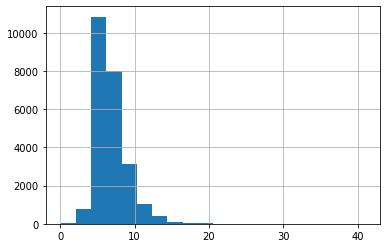

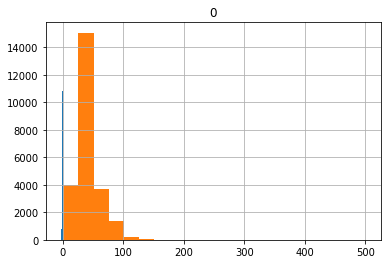

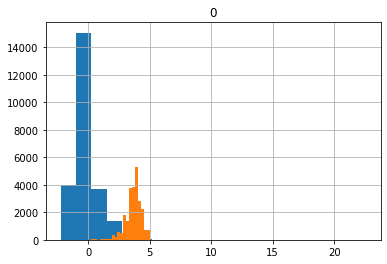

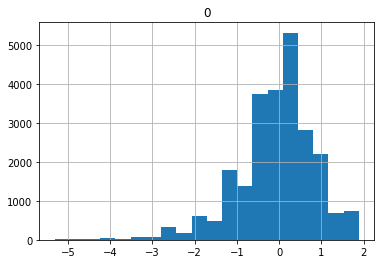

In [101]:
from sklearn.preprocessing import StandardScaler

x['ABV'].hist(bins=20)

abv = np.array(x['ABV']).reshape(-1,1)

abv_scaler = StandardScaler()
abv_scaler.fit(abv)
abv_scaled = abv_scaler.transform(abv)

pd.DataFrame(abv_scaled).hist(bins=20)

x['IBU'].hist(bins=20)

ibu = np.array(x['IBU']).reshape(-1,1)

ibu_scaler = StandardScaler()
ibu_scaler.fit(ibu)
ibu_scaled = ibu_scaler.transform(ibu)

pd.DataFrame(ibu_scaled).hist(bins=20)

x['ABV'] = abv_scaled
x['IBU'] = ibu_scaled

y.hist(bins=20)

y = np.array(y).reshape(-1,1)

y_scaler = StandardScaler()
y_scaler.fit(y)
y_scaled = y_scaler.transform(y)

y = y_scaled

pd.DataFrame(y).hist(bins=20)

## Lasso

In [102]:
x_prepped = x.values
y_prepped = y.reshape(len(y),)

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
 X_train, X_test, y_train, y_test = train_test_split(x_prepped, y_prepped, test_size = 0.2, random_state=12) 

In [105]:
from sklearn.linear_model import LassoCV

In [106]:
lasso_cv = LassoCV(fit_intercept=False, normalize=False, cv=5, random_state=12)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=False,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=12, selection='cyclic',
        tol=0.0001, verbose=False)

In [107]:
lasso_cv.score(X_test, y_test)

0.22677717273749354

In [108]:
lasso_cv.alpha_

0.00025762799632951305

In [109]:
# pd.DataFrame(lasso_cv.coef_).sort_values(by=0,ascending=False), 
pd.merge(pd.DataFrame(x.columns), pd.DataFrame(lasso_cv.coef_), left_index=True, right_index=True).sort_values('0_y', ascending=False)

,0_x,0_y
259,brewery_Afterthought Brewing Company,1.609345
2837,brewery_Tree House Brewing Company,0.896257
1643,brewery_J & J's Homebrewing,0.859713
615,brewery_Brasserie Cantillon,0.846022
2841,brewery_Trillium Brewing Company,0.824041
1529,brewery_Hill Farmstead Brewery,0.763149
1227,brewery_Fightin' Monkey,0.743977
2714,brewery_The Answer,0.738187
2178,brewery_Other Half Brewing Co.,0.737483
711,brewery_Brouwerij 3 Fonteinen,0.674273


In [110]:
print("num of coefs forced to 0 =", sum(lasso_cv.coef_ == 0))
print("% of coefs forced to 0 =", 100* sum(lasso_cv.coef_ == 0)/len(lasso_cv.coef_))

num of coefs forced to 0 = 2646
% of coefs forced to 0 = 85.7976653696498


In [111]:
y_predict = lasso_cv.predict(X_test)

y_test = y_scaler.inverse_transform(y_test)
y_predict = y_scaler.inverse_transform(y_predict)

results_df = pd.DataFrame([y_test, y_predict]).transpose()
results_df.columns = ['y_test', 'y_predict']

results_df['error'] = results_df['y_test'] - results_df['y_predict']
results_df['abs_error'] =abs(results_df['error'])

results_df.head()

,y_test,y_predict,error,abs_error
0,0.25,3.952818,-3.702818,3.702818
1,3.50,3.669982,-0.169982,0.169982
2,4.00,3.884694,0.115306,0.115306
3,4.75,4.103844,0.646156,0.646156
4,4.75,4.323591,0.426409,0.426409


''

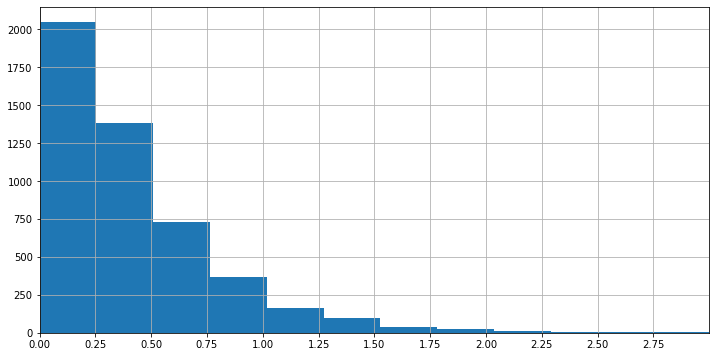

In [118]:
plt.figure(figsize=(12,6))

plt.hist(results_df['abs_error'], bins=15)
plt.xlim(0,3)
plt.xticks(ticks=(np.arange(0, 3, step=0.25)))
plt.grid()
;

''

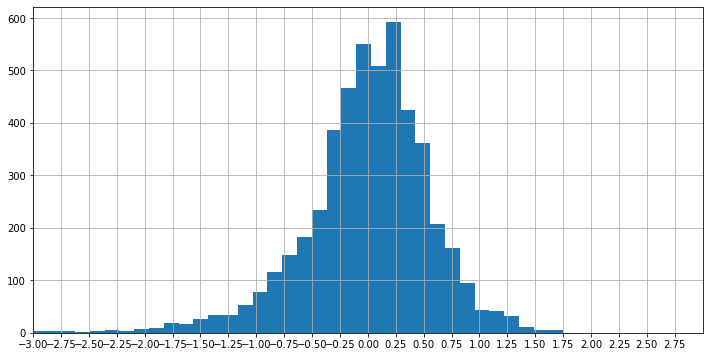

In [119]:
plt.figure(figsize=(12,6))

plt.hist(results_df['error'], bins=42)
plt.xlim(-3,3)
plt.xticks(ticks=(np.arange(-3, 3, step=0.25)))
plt.grid()
;

In [120]:
# Performance Metrics 

print("% of points with less than 0.25 absolute error", 100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
print("% of points with less than 0.50 absolute error", 100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))

mse = np.mean(results_df['error']**2)
print('\n')
print('MSE =', mse)
print('RMSE =', np.sqrt(mse))

mae = np.mean(results_df['abs_error'])
print('\n')
print('MAE =', mae)
print('RMAE =', np.sqrt(mae))

% of points with less than 0.25 absolute error 41.322144903806795
% of points with less than 0.50 absolute error 69.3614408514122


MSE = 0.3393463830485163
RMSE = 0.5825344479500901


MAE = 0.4229924519585996
RMAE = 0.6503786988813515


## Elastic Net

In [121]:
from sklearn.linear_model import ElasticNetCV

l1_ratio_list = [.1, .5, .7, .9, .95, .99, 1]

In [122]:
enet_cv = ElasticNetCV(l1_ratio=l1_ratio_list, fit_intercept=False, normalize=False, cv=5, random_state=12)
enet_cv.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=False,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=12, selection='cyclic', tol=0.0001,
             verbose=0)

In [123]:
print(enet_cv.l1_ratio_, enet_cv.alpha_)

1.0 0.00025762799632951305


In [124]:
y_predict_enet = enet_cv.predict(X_test)
y_predict_enet = y_scaler.inverse_transform(y_predict_enet)

In [125]:
enet_results = pd.DataFrame([y_predict_enet, y_test]).transpose()
enet_results.columns = ['prediction', 'actual']
enet_results

,prediction,actual
0,3.952818,0.25
1,3.669982,3.50
2,3.884694,4.00
3,4.103844,4.75
4,4.323591,4.75
5,3.737905,3.50
6,3.559596,4.25
7,4.228065,4.25
8,3.643045,3.25
9,4.517151,4.25


In [126]:
enet_results['error'] = enet_results['prediction'] - enet_results['actual']
enet_results['abs_error'] = abs(enet_results['error'])
enet_results

,prediction,actual,error,abs_error
0,3.952818,0.25,3.702818,3.702818
1,3.669982,3.50,0.169982,0.169982
2,3.884694,4.00,-0.115306,0.115306
3,4.103844,4.75,-0.646156,0.646156
4,4.323591,4.75,-0.426409,0.426409
5,3.737905,3.50,0.237905,0.237905
6,3.559596,4.25,-0.690404,0.690404
7,4.228065,4.25,-0.021935,0.021935
8,3.643045,3.25,0.393045,0.393045
9,4.517151,4.25,0.267151,0.267151


In [127]:
# Performance Metrics 

results_df = enet_results
print("% of points with less than 0.25 absolute error", 100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
print("% of points with less than 0.50 absolute error", 100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))

mse = np.mean(results_df['error']**2)
print('\n')
print('MSE =', mse)
print('RMSE =', np.sqrt(mse))

mae = np.mean(results_df['abs_error'])
print('\n')
print('MAE =', mae)
print('RMAE =', np.sqrt(mae))

% of points with less than 0.25 absolute error 41.322144903806795
% of points with less than 0.50 absolute error 69.3614408514122


MSE = 0.3393463830485163
RMSE = 0.5825344479500901


MAE = 0.4229924519585996
RMAE = 0.6503786988813515
